# TP: Machine Learning

## TP2: Classification (4h) 

En apprentissage automatique, la classification est liée aux approches d’apprentissage supervisé
dans lesquelles l’algorithme s’adapte à partir d’un ensemble de données annotées. Cette phase d’ap-
prentissage est suivie d’une validation phase pour évaluer le modèle de classification à travers plu-
sieurs métriques. Une fois le modèle correctement validée, une phase de généralisation permet de
classer les nouvelles données. L’ensemble de données fourni a été produit par l’Organisation Mon-
diale de la Santé (OMS). Il a mutualisé l’évolution de 20 longs métrages depuis 15 ans et dans de
nombreux pays. L’un des objectifs de ce TP est de comprendre l’espace des caractéristiques et es-
sayer de prédire le développement des pays. 

**Objectifs :**

- Visualiser l’espace des caractéristiques.
- Discuter de la séparabilité des données dans l’espace des caractéristiques.
- Normaliser les ensembles de données.
- Former un K-NN, un arbre de décision, une forêt aléatoire et un SVM.
- Visualisez la frontiere de décision pour chaque méthode.
- Créer un ensemble de données de test.
- Calculer les scores AUC sur un ensemble de données d’évaluation.
- Ajuster les hyperparamètres.
- Visualiser la modification de la frontiere de décision pour chaque réglage.
- Discutez des limites des quatre implémentations des modèles.

Le notebook correspondant à ce TP est disponible sur Moodle. Répondez aux questions directement
sur ce notebook. Le notebook doit être remis avant la prochaine session. Le travail peut être fait en
binôme.

## 1 : Visualisation de l’espace des caractéristiques
Vous travaillerez sur le jeu de données de l’OMS en l’an 2000. Cette première étape consiste à choisir
deux caractéristiques pour effectuer une classification.

**À faire 1.1**

Exécutez les cellules suivantes :

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors
import numpy as np

df = pd.read_csv("Life_Expectancy_Data.csv")
df = df.dropna()
df.info()

df1 = df[(df.Year == 2000)]

<class 'pandas.core.frame.DataFrame'>
Index: 1649 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          1649 non-null   object 
 1   Year                             1649 non-null   int64  
 2   Status                           1649 non-null   object 
 3   Life_expectancy                  1649 non-null   float64
 4   Adult_mortality                  1649 non-null   float64
 5   Infant_deaths                    1649 non-null   int64  
 6   Alcohol                          1649 non-null   float64
 7   Percentage_expenditure           1649 non-null   float64
 8   Hepatitis_B                      1649 non-null   float64
 9   Measles                          1649 non-null   int64  
 10  BMI                              1649 non-null   float64
 11  Under-five_deaths                1649 non-null   int64  
 12  Polio                    

<module 'matplotlib.pyplot' from '/etc/jupyterhub/kernel/2A_ML_env/lib/python3.10/site-packages/matplotlib/pyplot.py'>

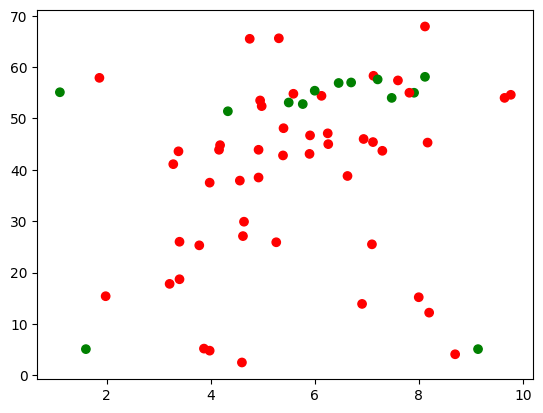

In [10]:
df_X = df1[['Total_expenditure', 'BMI']]
df_Status = df1[['Status']]

df_Y = df_Status.replace(['Developing', 'Developed'], [0, 1])

np_Y = df_X.to_numpy()
plt.scatter(np_Y[:,0], 
    np_Y[:,1], 
    c=np.squeeze(df_Y.to_numpy()), 
    cmap=matplotlib.colors.ListedColormap(['red', 'green'])
    )
plt

**QUESTION 1**

Pourquoi le statut du label a-t-il été binarisé ?
Le label a été binarisé

Nous binarisons le label afin que le plot puisse etre éxécuté (pour les chaines de caractères)

Cet espace de caractéristiques est-il facilement séparable ?

Cet espace n'est pas facilement séparable car, comme nous pouvons le voir, les datas sont stackés et superposées.



**À coder 1.2**

Tracer les dépenses totales (Expenditure) par rapport à la scolarité (Schooling).

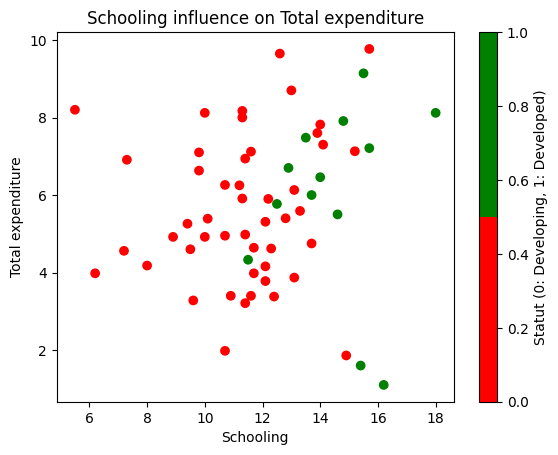

In [6]:
data_X = df1[['Schooling', 'Total_expenditure']]
data_Status = df1[['Status']]

data_Y = data_Status.replace(['Developing', 'Developed'], [0, 1])

array_X = data_X.to_numpy()
plt.scatter(array_X[:, 0], 
            array_X[:, 1], 
            c=np.squeeze(data_Y.to_numpy()),
            cmap=matplotlib.colors.ListedColormap(['red', 'green'])
            )
plt.title('Schooling influence on Total expenditure')
plt.xlabel('Schooling')
plt.ylabel('Total expenditure')
plt.colorbar(label='Statut (0: Developing, 1: Developed)')


**À coder 1.3**

Tracez l’espérance de vie (Life Expectancy) à la scolarité (Schooling).

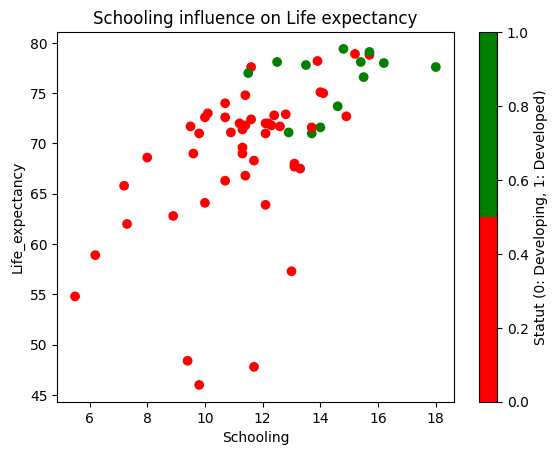

In [8]:
data_X = df1[['Schooling', 'Life_expectancy']]
data_Status = df1[['Status']]

data_Y = data_Status.replace(['Developing', 'Developed'], [0, 1])

array_X = data_X.to_numpy()
plt.scatter(array_X[:, 0], 
            array_X[:, 1], 
            c=np.squeeze(data_Y.to_numpy()), 
            cmap=matplotlib.colors.ListedColormap(['red', 'green'])
           )
plt.title('Schooling influence on Life expectancy')
plt.xlabel('Schooling')
plt.ylabel('Life_expectancy')
plt.colorbar(label='Statut (0: Developing, 1: Developed)')


**QUESTION 2**

Quelles seraient les meilleures caractéristiques à utiliser ? 

Utilisez ces caractéristiques en tant que df_X.

 'Schooling' et 'Life_Expectancy'.

L'utilisation du plot, nous permet de séparer l'espace plus facilement.

##  2: Normalisation des ensembles de données

Pour classer, les valeurs de l’ensemble de données d’apprentissage doivent être normalisées (c’est-
à-dire entre 0 et 1). Cette normalisation peut être effectuée de différentes manières.

**À coder 2.1**

Normalisez df_X. Cette normalisation doit parfaitement encadrer les données (c’est-à-dire que les
valeurs minimales et maximales de chaque caractéristique doivent être respectivement 0 et 1).

In [12]:
# Dans un premier temps, nous effectuons le calcul des min et max 
s_max = df1['Schooling'].max()
s_min = df1['Schooling'].min()
l_max = df1['Life_expectancy'].max()
l_min = df1['Life_expectancy'].min()

# Puis, à partir des extrémums on normalise :
df_s = (df1['Schooling'] - s_min) / (s_max - s_min)
df_l = (df1['Life_expectancy'] - l_min) / (l_max - l_min)
df_X_norm = pd.concat([df_s, df_l], axis=1)

# Et enfin, nous transformons les doonées en .to_numpy
np_X_norm = df_X_norm.to_numpy()
np_Y = np.squeeze(df_Y.to_numpy())

**À faire 2.2**

Chacune des cellules suivantes effectue une étape d’apprentissage et un calcul des scores AUC.
Pour chaque classificateur, plusieurs paramètres ont été choisis.

/etc/jupyterhub/kernel/2A_ML_env/lib/python3.10/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


(61, 2)


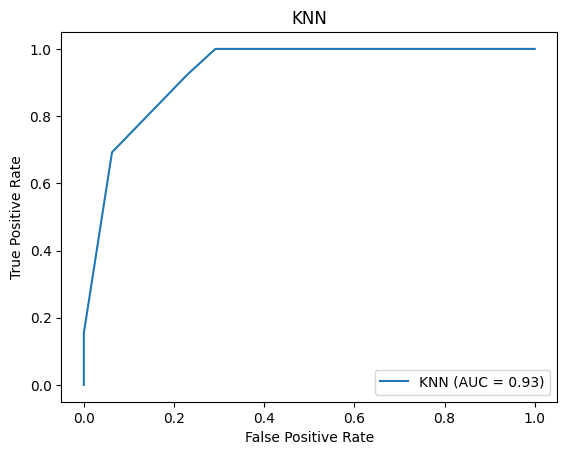

In [17]:
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

clf1 = KNeighborsClassifier(n_neighbors=5)
clf1.fit(np_X_norm, np_Y)

np_Y_pred = clf1.predict_proba(df_X_norm)
print(np_Y_pred.shape)

fpr, tpr, thresholds = metrics.roc_curve(np_Y, np_Y_pred[:,1])
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='KNN')
display.plot()
plt.title('KNeighborsClassifier')
plt.show()

/etc/jupyterhub/kernel/2A_ML_env/lib/python3.10/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


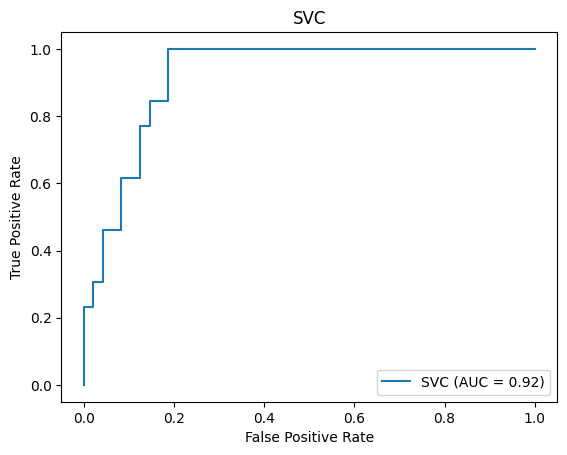

In [34]:
from sklearn.svm import SVC

clf2 = SVC(C=2.0, kernel='linear', probability=True)
clf2.fit(np_X_norm, np_Y)

np_Y_pred = clf2.predict_proba(df_X_norm)

fpr, tpr, thresholds = metrics.roc_curve(np_Y, np_Y_pred[:,1])
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                   estimator_name='SVC')
display.plot()
plt.title('SVC')
plt.show()

/etc/jupyterhub/kernel/2A_ML_env/lib/python3.10/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


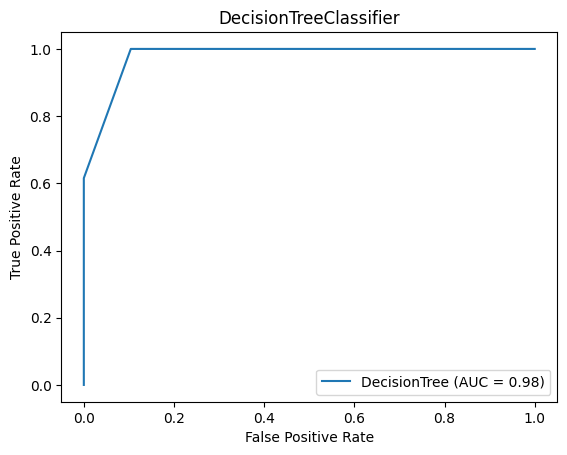

In [35]:
from sklearn.tree import DecisionTreeClassifier

clf3 = DecisionTreeClassifier(max_depth=3)
clf3.fit(np_X_norm, np_Y)

np_Y_pred = clf3.predict_proba(df_X_norm)

fpr, tpr, thresholds = metrics.roc_curve(np_Y, np_Y_pred[:,1])
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                   estimator_name='DecisionTree')
display.plot()
plt.title('DecisionTreeClassifier')
plt.show()

/etc/jupyterhub/kernel/2A_ML_env/lib/python3.10/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


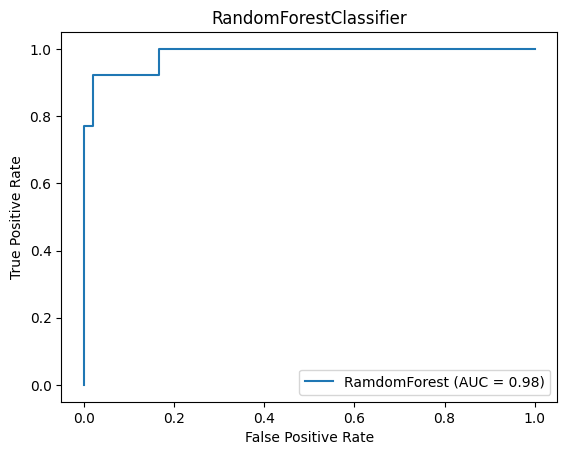

In [36]:
from sklearn.ensemble import RandomForestClassifier

clf4 = RandomForestClassifier(n_estimators=100, max_depth=3)
clf4.fit(np_X_norm, np_Y)

np_Y_pred = clf4.predict_proba(df_X_norm)

fpr, tpr, thresholds = metrics.roc_curve(np_Y, np_Y_pred[:,1])
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                   estimator_name='RamdomForest')
display.plot()
plt.title('RandomForestClassifier')
plt.show()

**QUESTION 3**

Identifiez chaque classificateur et spécifiez les paramètres utilisés.

Décrire et expliquer les résultats obtenus pour chaque courbe ROC. Quelle est la relation entre l’AUC
et la courbe ROC ? D’après la courbe ROC, quel modèle est le meilleur si l’on veut maximiser la sen-
sibilité ? Et si on veut maximiser la spécificité ? Comparez ces résultats avec l’AUC.

1er classificateur : permet de prédire les classes, grace aux 5 plus proches voisins pour chaque point.
2e classificateur : permet de trouver la séparation optimale avec des vecteurs de support.
3e classificateur : a une profondeur maximale de 3.
4e classificateur : fait 100 estimation et la profondeur maximale est de 3.

La courbe ROC (ou fonction d’efficacité du récepteur) permet de montrer les progrès réalisés grâce à un classificateur binaire. 
La courbe parfaite serait : pour x, y=1 et le pire : x=y. 
Comme nous pouvons le voir, tous les modeles sont plus ou moins correct car aucun possede une diagonale du type x = y.

Pour le problème de classification binaire, la limite de décision est une hypersurface qui divise l’es-
pace des fonctionnalités entre deux ensembles (pour chaque classe). Ensuite, cette surface est
composée de tous les points d’équiprobabilité dans l’espace des caractéristiques. gauche.est tout simplement l'air sous la courbe du ROC.g
Pour maximiser la sensibilité, il nous faut un maximum de vrais ++, soit une courbe qui reste à 1. rExemple :  Tree et la Random Fores.i
Pour maximiser la spécificité, il nous faut de vrai --, soit une courbe qui longe l'axe des ordonnée en 0lExemple : lents mais le Classifier. peu meilleur.

**À faire 2.3**

Tracez la limite de décision avec df_X pour chaque classificateur.

<module 'matplotlib.pyplot' from '/etc/jupyterhub/kernel/2A_ML_env/lib/python3.10/site-packages/matplotlib/pyplot.py'>

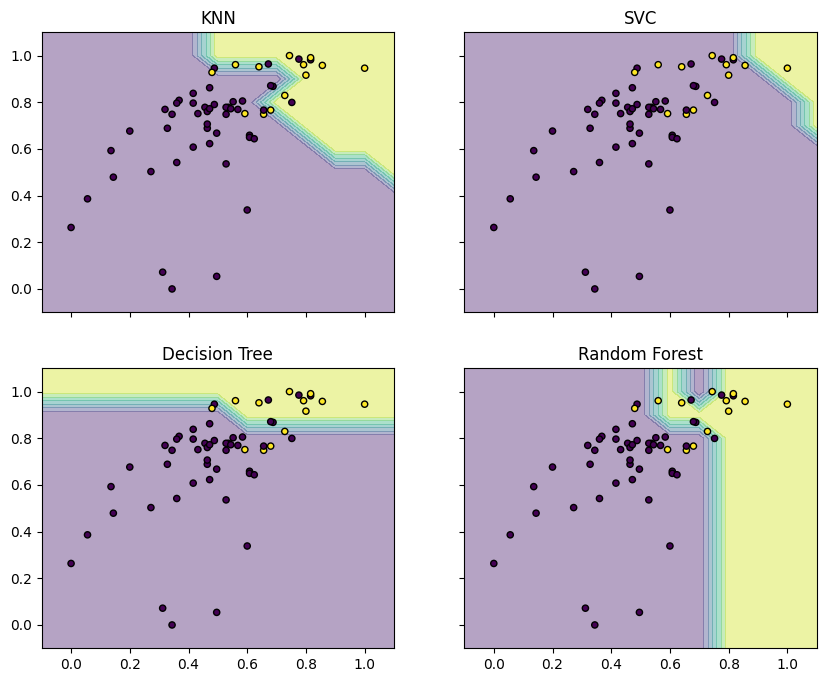

In [55]:
from itertools import product

x_min, x_max = np_X_norm[:, 0].min() - 0.1, np_X_norm[:, 0].max() + 0.1
y_min, y_max = np_X_norm[:, 1].min() - 0.1, np_X_norm[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(10, 8))

for idx, clf, tt in zip(product([0, 1], [0, 1]),
                        [clf1, clf2, clf3, clf4],
                        ['KNN', 'SVC', 'Decision Tree', 'Random Forest']):

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
    axarr[idx[0], idx[1]].scatter(np_X_norm[:, 0], np_X_norm[:, 1], c=np_Y,
                                  s=20, edgecolor='k')
    axarr[idx[0], idx[1]].set_title(tt)

plt

**QUESTION 4**

Quel est le principal problème de l’étape de classification avec cet ensemble de données ?

Le principal problème est que les deux zones à séparer ont l'air de se superposer.


À votre avis, quel classificateur est le mieux adapté à cette tâche de classification ? Justifiez votre
réponse.

Le classificateur  le mieux adapté est, en soit, le KNN. Il possede le + de points dans la zone. Cependant les paramètres choisis auparavant ne sont surement pas optimal car le résultat est moins bon que pour le Decision Tree et la Random Forest.


## 3: Correction des biais et réglages des modèles

Dans cette partie, vous vous concentrerez sur l’amélioration des scores AUC des quatre méthodes.

Tout d’abord, vous peserez les classes pour équilibrer la prédiction du classificateur. Ensuite, vous
ajusterez divers hyperparamètres.

**À coder 3.1**

Calculez le pourcentage de classe ”Developed” dans df_Y.

In [21]:
Developed = np_Y[np_Y==1].size
Developing = np_Y[np_Y==0].size
dev_prct = Developed / (Developed + Developing)
dev_prct

0.21311475409836064

Les algorithmes SVM, Decision Tree et Random Forest ont un paramètre nommé : class_weight.
Voici un extrait de la documentation sklearn :

class_weight dict, list of dict or “balanced”, default=None

Poids associés aux classes sous la forme class_label:weight. Si aucun, toutes les classes sont cen-
sées avoir un poids de un. Pour les problèmes multi-sorties, une liste de dicts peut être fournie dans
le même ordre que les colonnes de y.

Le mode « équilibré » (“balanced”) utilise les valeurs de y pour ajuster automatiquement les poids
inversement proportionnels aux fréquences de classe dans les données d’entrée.


**QUESTION 5**

Quel serait le poids pour chaque classe ?

21% correspond au poids de la classe developé ;
Donc 79% corespond au poids de la classe développement


**À coder 3.2**

Équilibrez le classificateur SVM, Decision Tree et Random Forest et tracez les limites de décision.

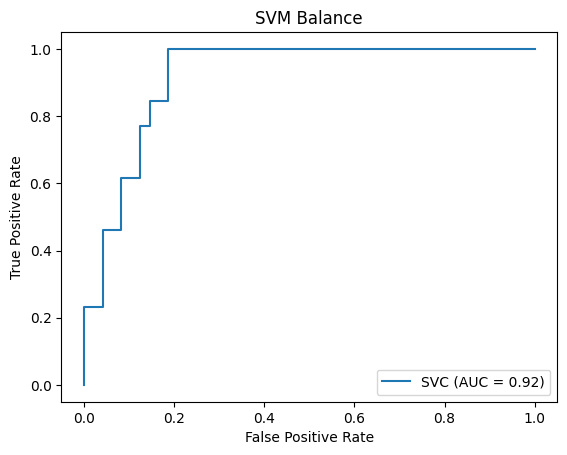

In [57]:
Classificateur = SVC(C=2.0, kernel='linear', probability=True, class_weight='balanced')
Classificateur.fit(np_X_norm, np_Y)

np_Y_pred = Classificateur.predict_proba(np_X_norm)

fpr, tpr, thresholds = metrics.roc_curve(np_Y, np_Y_pred[:,1])
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='SVC')
display.plot()
plt.title('SVM Balance')
plt.show()

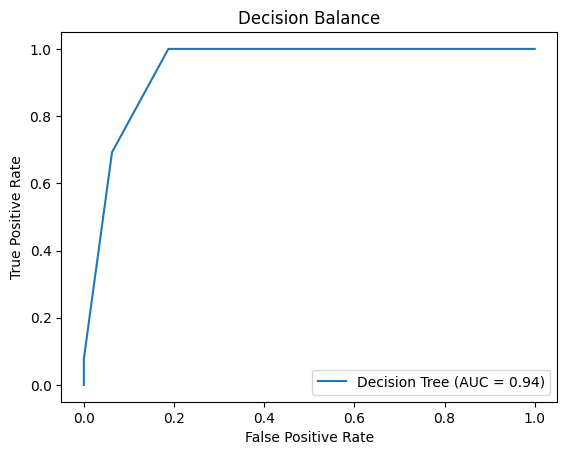

In [48]:
Classificateur_2 = DecisionTreeClassifier(max_depth=3, class_weight='balanced')
Classificateur_2.fit(np_X_norm, np_Y)

np_Y_pred = clf6.predict_proba(np_X_norm)

fpr, tpr, thresholds = metrics.roc_curve(np_Y, np_Y_pred[:,1])
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Decision Tree')
display.plot()
plt.title('Decision Balance')
plt.show()

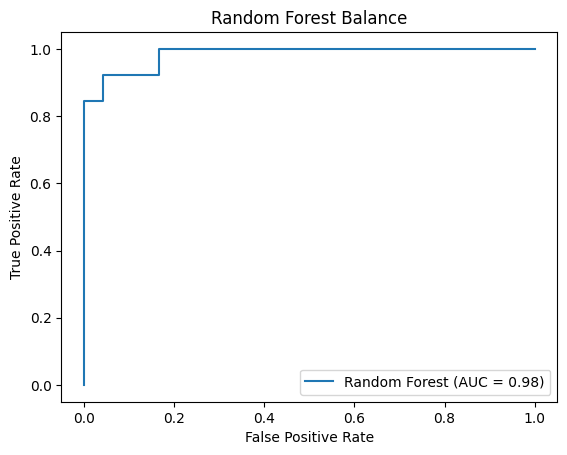

In [47]:
Classificateur_3 = RandomForestClassifier(n_estimators=100, max_depth=3, class_weight='balanced')
Classificateur_3.fit(np_X_norm, np_Y)

np_Y_pred = Classificateur_3.predict_proba(np_X_norm)

fpr, tpr, thresholds = metrics.roc_curve(np_Y, np_Y_pred[:,1])
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Random Forest')
display.plot()
plt.title('Random Forest Balance')
plt.show()

**À coder 3.3**

Calculez le nouveau score AUC

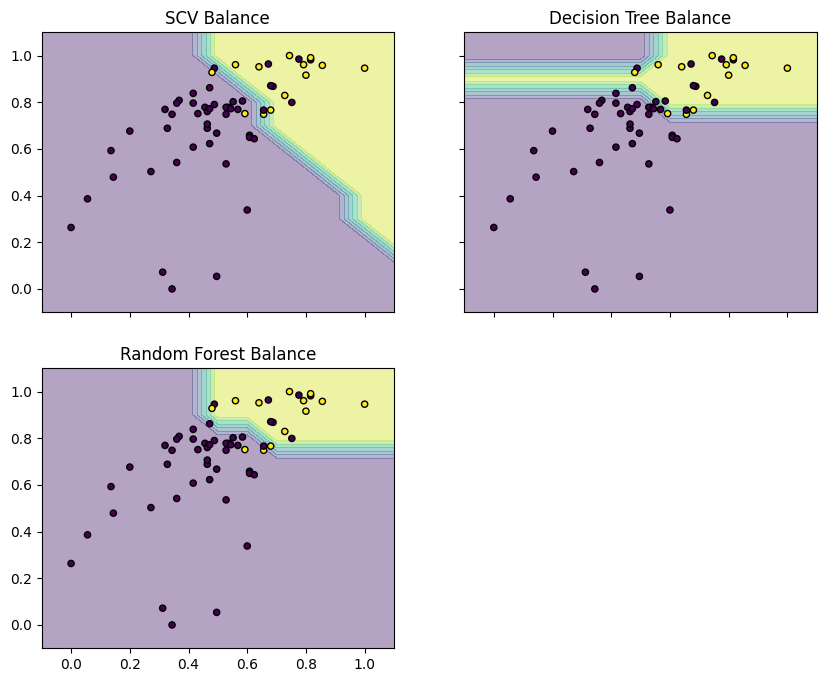

In [53]:
# Définition des bornes pour  x et y
x_min, x_max = np_X_norm[:, 0].min() - 0.1, np_X_norm[:, 0].max() + 0.1
y_min, y_max = np_X_norm[:, 1].min() - 0.1, np_X_norm[:, 1].max() + 0.1

# Création en x et y avec une résolution de 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

# Création d'une figure 
f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(10, 8))

# Itération sur les 3 classificateurs
for idx, clf, tt in zip(product([0, 1], [0, 1]), 
                        [Classificateur, Classificateur_2, Classificateur_3], 
                        ['SCV Balance', 'Decision Tree Balance', 'Random Forest Balance']
                       ):

    # Prédiction des classes pour chaque point 
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    
    # Remise en forme des prédictions 
    Z = Z.reshape(xx.shape)

    # Tracé des prédictions
    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
    
    # Tracé des données définies par np_Y
    axarr[idx[0], idx[1]].scatter(np_X_norm[:, 0], np_X_norm[:, 1], c=np_Y, s=20, edgecolor='k')
    
    # Définition du titre du tracé en fonction du nom du classificateur
    axarr[idx[0], idx[1]].set_title(tt)

# Suppression du dernier tracé
f.delaxes(axarr[1, 1])

# Affichage de la figure
plt.show()

In [ ]:
**QUESTION 6**

Calcul du nouveau AUC :

SVC: 0.92
Decision Tree : 0.94
Random Forest : 0.98 

Les scores de l’AUC ont-ils augmenté ? Comment l’interprètez-vous ?
Selon vous, l’équilibre des classes a-t-il amélioré le classement ?

Nous remarquons qu'apres l'équilibrage, l'AUC de chaque classe reste inchangé. 
L'équilibrage n'influence pas l'amélioration des prédictions.

Concentrons-nous sur le classificateur SVM.

Sklearn autorise plusieurs noyaux.

Voici un extrait de la documentation :

**kernel** ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’, default=’rbf’

Spécifie le type de noyau à utiliser dans l’algorithme. Il doit s’agir de «linear», «poly», «rbf», «sigmoïd»,
« precomputed » ou appelable. Si aucun n’est donné, «rbf» sera utilisé. Si un appelable est donné, il
est utilisé pour précalculer la matrice du noyau à partir des matrices de données ; cette matrice doit
être un tableau de formes (n_samples, n_samples).

**À coder 3.4**

Testez les noyaux gaussiens (rbf) et polynomial avec un équilibrage des classes et affichez la fron-
tière de décision.

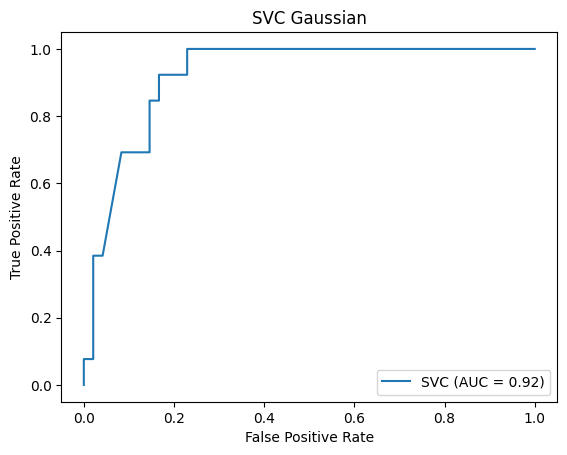

In [65]:
Classificateur_4 = SVC(C=2.0, kernel='rbf', probability=True, class_weight='balanced')
Classificateur_4.fit(np_X_norm, np_Y)

np_Y_pred = Classificateur_4.predict_proba(np_X_norm)

fpr, tpr, thresholds = metrics.roc_curve(np_Y, np_Y_pred[:,1])
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='SVC')
display.plot()
plt.title('SVC Gaussian')
plt.show()

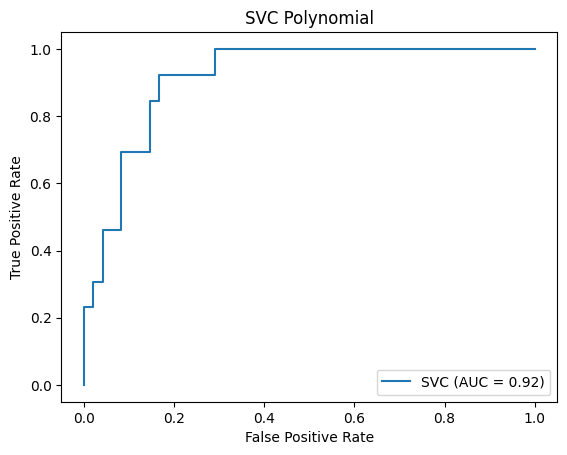

In [69]:
Classificateur_5 = SVC(C=2.0, kernel='poly', probability=True, class_weight='balanced')
Classificateur_5.fit(np_X_norm, np_Y)

np_Y_pred = Classificateur_5.predict_proba(np_X_norm)

fpr, tpr, thresholds = metrics.roc_curve(np_Y, np_Y_pred[:,1])
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='SVC')
display.plot()
plt.title('SVC Polynomial')
plt.show()

<module 'matplotlib.pyplot' from '/etc/jupyterhub/kernel/2A_ML_env/lib/python3.10/site-packages/matplotlib/pyplot.py'>

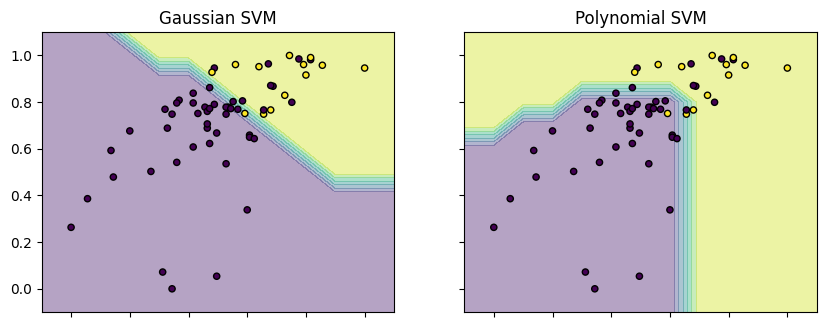

In [70]:
x_min, x_max = np_X_norm[:, 0].min() - 0.1, np_X_norm[:, 0].max() + 0.1
y_min, y_max = np_X_norm[:, 1].min() - 0.1, np_X_norm[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(10, 8))

for idx, clf, tt in zip(product([0, 1], [0, 1]), [clf8, clf9], ['Gaussian SVM', 'Polynomial SVM']):

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
    axarr[idx[0], idx[1]].scatter(np_X_norm[:, 0], np_X_norm[:, 1], c=np_Y, s=20, edgecolor='k')
    axarr[idx[0], idx[1]].set_title(tt)

f.delaxes(axarr[1, 0])
f.delaxes(axarr[1, 1])

plt

**QUESTION 7**

Selon vous, quel est le meilleur noyau pour cet ensemble de données ? 

Le meilleur noyau est le gaussien car, en plus de prendre en compte tous les points dans son espace, son hyperplan est le plus proche de ses points.

**BONUS**

Ajustez les paramètres des algorithmes d’arbre de décision et de forêt aléatoire et tracez les fron-
tières de décision.

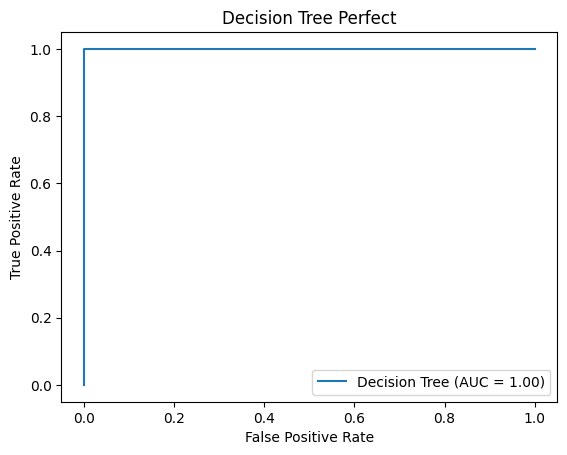

In [72]:
Classificateur_6 = DecisionTreeClassifier(max_depth=10)
Classificateur_6.fit(np_X_norm, np_Y)

np_Y_pred = Classificateur_6.predict_proba(np_X_norm)

fpr, tpr, thresholds = metrics.roc_curve(np_Y, np_Y_pred[:,1])
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Decision Tree')
display.plot()
plt.title('Decision Tree Perfect')
plt.show()

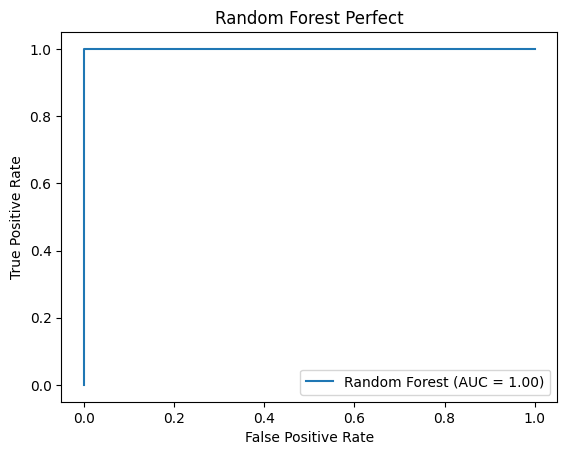

In [74]:
Classificateur_7 = RandomForestClassifier(n_estimators=100, max_depth=10)
Classificateur_7.fit(np_X_norm, np_Y)

np_Y_pred = Classificateur_7.predict_proba(np_X_norm)

fpr, tpr, thresholds = metrics.roc_curve(np_Y, np_Y_pred[:,1])
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Random Forest')
display.plot()
plt.title('Random Forest Perfect')
plt.show()

<module 'matplotlib.pyplot' from '/etc/jupyterhub/kernel/2A_ML_env/lib/python3.10/site-packages/matplotlib/pyplot.py'>

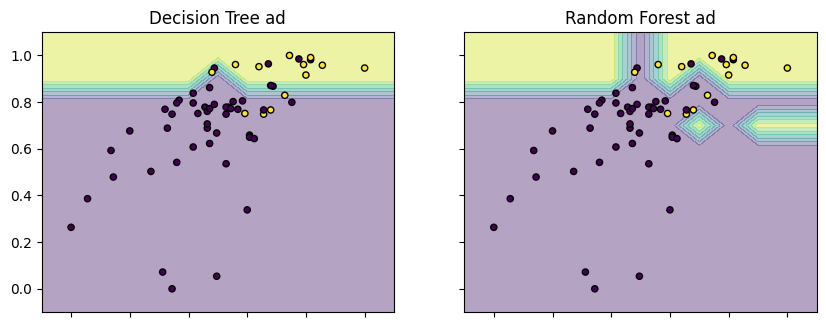

In [75]:
x_min, x_max = np_X_norm[:, 0].min() - 0.1, np_X_norm[:, 0].max() + 0.1
y_min, y_max = np_X_norm[:, 1].min() - 0.1, np_X_norm[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(10, 8))

for idx, clf, tt in zip(product([0, 1], [0, 1]), [Classificateur_6, Classificateur_7], ['Decision Tree ad', 'Random Forest ad']):

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
    axarr[idx[0], idx[1]].scatter(np_X_norm[:, 0], np_X_norm[:, 1], c=np_Y, s=20, edgecolor='k')
    axarr[idx[0], idx[1]].set_title(tt)

f.delaxes(axarr[1, 0])
f.delaxes(axarr[1, 1])

plt

Nos scores AUC sont bien meilleurs maintenant ! Malheureusement, le modèle a l'air d'être bien trop spécifique à nos données d'entrainement, il est 'overfited'. Si on prend de nouvelles données il y a de grandes chances pour que le score AUC soit bien plus bas.

## STEP 4: An evaluation dataset

This part is to test the generalization of your models.

You trained several classifiers on two features extracted from the year 2000.

**À coder 4.1**

Appliquez vos modèles sur l’année 2012.

In [91]:
df = pd.read_csv("Life_Expectancy_Data.csv")
df = df.dropna()
df5 = df[(df.Year == 2012)]

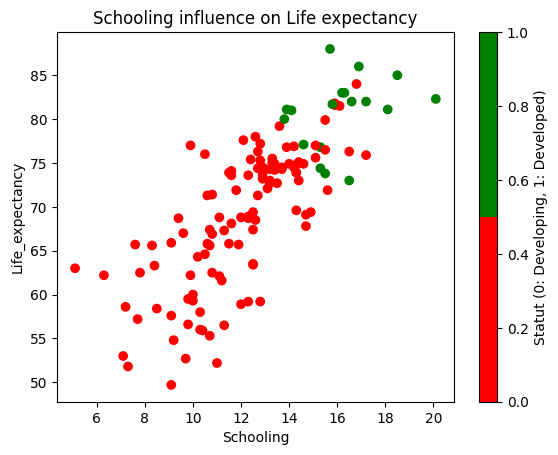

In [92]:
df_X = df5[['Schooling', 'Life_expectancy']]
df_Status = df5[['Status']]

df_Y = df_Status.replace(['Developing', 'Developed'], [0, 1])

np1 = df_X.to_numpy()
plt.scatter(np1[:,0], np1[:,1], c=np.squeeze(df_Y.to_numpy()), cmap=matplotlib.colors.ListedColormap(['red', 'green']))
plt.title('Schooling influence on Life expectancy'), plt.xlabel('Schooling'), plt.ylabel('Life_expectancy')
plt.colorbar(label='Statut (0: Developing, 1: Developed)')

In [82]:
# Calcul des min et max pour la normalisation
schoolmax = df5['Schooling'].max()
schoolmin = df5['Schooling'].min()
lifemax = df5['Life_expectancy'].max()
lifemin = df5['Life_expectancy'].min()

# Normalisation
df6 = (df5['Schooling'] - schoolmin) / (schoolmax - schoolmin)
df7 = (df5['Life_expectancy'] - lifemin) / (lifemax - lifemin)
df_X_norm = pd.concat([df6, df7], axis=1)

# Passage en type de données numpy
np_X_norm = df_X_norm.to_numpy()
np_Y = np.squeeze(df_Y.to_numpy())

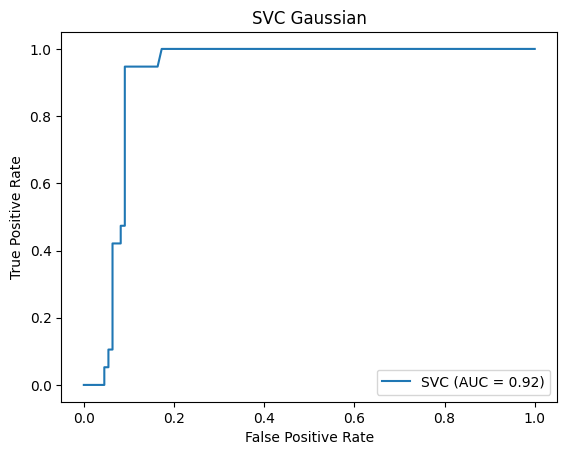

In [84]:
Classificateur_8 = SVC(C=2.0, kernel='rbf', probability=True, class_weight='balanced')
Classificateur_8.fit(np_X_norm, np_Y)

np_Y_pred = Classificateur_8.predict_proba(np_X_norm)

fpr, tpr, thresholds = metrics.roc_curve(np_Y, np_Y_pred[:,1])
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='SVC')
display.plot()
plt.title('SVC Gaussian')
plt.show()

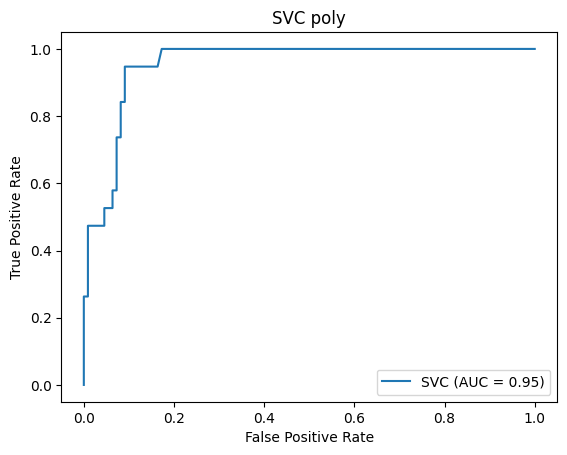

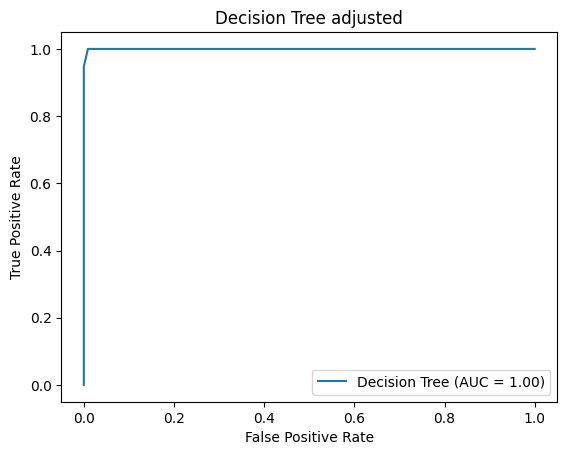

In [86]:
Classificateur_9 = SVC(C=2.0, kernel='poly', probability=True, class_weight='balanced')
Classificateur_9.fit(np_X_norm, np_Y)

np_Y_pred = Classificateur_9.predict_proba(np_X_norm)

fpr, tpr, thresholds = metrics.roc_curve(np_Y, np_Y_pred[:,1])
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='SVC')
display.plot()
plt.title('SVC poly')
plt.show()

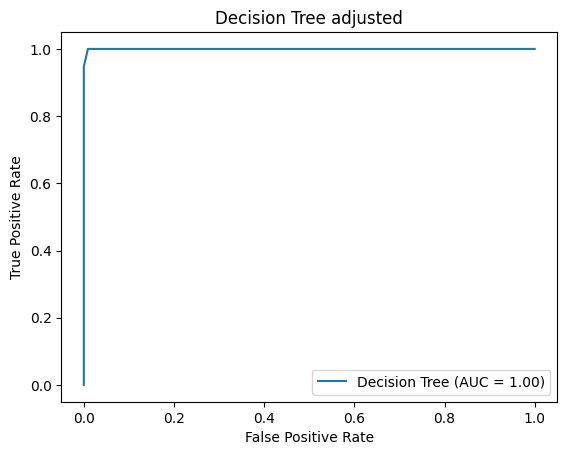

In [87]:
Classificateur_10 = DecisionTreeClassifier(max_depth=10)
Classificateur_10.fit(np_X_norm, np_Y)

np_Y_pred = Classificateur_10.predict_proba(np_X_norm)

fpr, tpr, thresholds = metrics.roc_curve(np_Y, np_Y_pred[:,1])
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Decision Tree')
display.plot()
plt.title('Decision Tree adjusted')
plt.show()

<module 'matplotlib.pyplot' from '/etc/jupyterhub/kernel/2A_ML_env/lib/python3.10/site-packages/matplotlib/pyplot.py'>

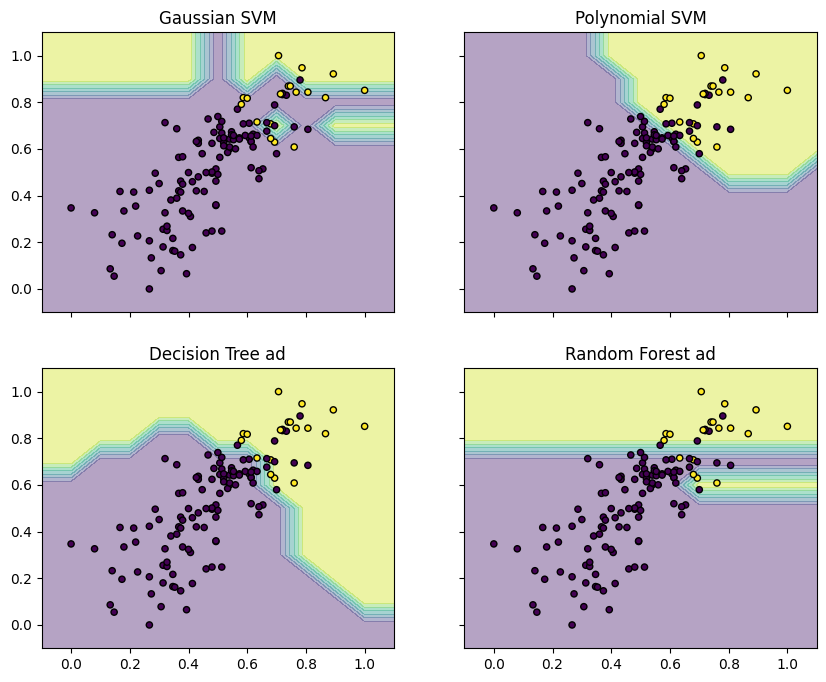

In [88]:
x_min, x_max = np_X_norm[:, 0].min() - 0.1, np_X_norm[:, 0].max() + 0.1
y_min, y_max = np_X_norm[:, 1].min() - 0.1, np_X_norm[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(10, 8))

for idx, clf, tt in zip(product([0, 1], [0, 1]), [Classificateur_7, Classificateur_8, Classificateur_9, Classificateur_10], ['Gaussian SVM', 'Polynomial SVM', 'Decision Tree ad', 'Random Forest ad']):

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
    axarr[idx[0], idx[1]].scatter(np_X_norm[:, 0], np_X_norm[:, 1], c=np_Y, s=20, edgecolor='k')
    axarr[idx[0], idx[1]].set_title(tt)

plt

**QUESTION 8**

Vos modèles se généralisent-ils encore bien en 2012 ?

ils ne generalisent bien car ils sont proches des points.
